<a href="https://colab.research.google.com/github/jufochoa/ML-Geociencias/blob/main/An%C3%A1lisis_Clasificacion_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.PRESENTACION

En el cálculo del transporte de sedimentos a partir de mediciones del campo de flujo se tienen diferentes problemas asociados a: las características del lecho, la disponibilidad del sedimento,además de problemas de escala. Los datos usados corresponden a la base de datos presentada por Brownlie (1981), la cual se compone de 7099 datos 
datos, a partir de 1887 mediciones en ríos naturales y 5212 mediciones en canales de laboratorio. Las variables involucradas en dichas mediciones son:

- Caudal,Q(L/s) - Variable numérica
- Ancho,B (m)   - Variable numérica
- Profundidad de flujo,y (m)  - Variable numérica
- Pendiente del cauce,S(S*1000)  - Variable numérica
- Tamaño medio de los sedimentos del fondo,D50(mm)  - Variable numérica
- Gradación,G (Adim.)  - Variable numérica
- Gravedad específica,Ss(Adim.)  - Variable numérica
- Concentración,C (ppm)  - Variable numérica
- Temperatura, T(C) - Variable numérica
- Forma del Lecho,FL - Variable categórica: 0 - No se observa, 1 - Lecho plano previo a inicio del movimiento, 2 - Rizos, 3 - Dunas, 4 - Lecho en Transición, 5- Lecho plano, 6 Ondas permanentes, 7- Antidunas,  8 Rápidos y pozos.




Se analiza en este notebook un problema de clasificación con una variable categórica muticlase creada a partir de los datos y que corresponde a la variable**Tipo**, la cual hace referencia a la intensidad del transporte de sedimento según la clasificación propuesta por Gomez & Soar (2020), con dos categorías: 1-Transporte ilimitado y 0 - Transporte restringido.


# 1.ANÁLISIS EXPLORATORIO

In [1]:
#Instalación de bibliotecas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Cargue de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [4]:
! git clone https://github.com/jufochoa/ML-Geociencias.git

Cloning into 'ML-Geociencias'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [5]:
#Carga de datos
from google.colab import drive
dcrudos=pd.read_excel("/content/ML-Geociencias/BDSedimentos.xlsx")

dcrudos.head(6)
dcrudos.tail(6)

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C,Nombre,Tipo
7021,31,0.0300,0.5,0.122,1.66,0.18,3.3,2.65,-1.0,3,150.0,ZNA,Laboratorio
7022,32,0.0300,0.5,0.115,1.80,0.18,3.3,2.65,-1.0,3,500.0,ZNA,Laboratorio
7023,33,0.0298,0.5,0.092,3.50,0.18,3.3,2.65,-1.0,6,1007.0,ZNA,Laboratorio
7024,34,0.0304,0.5,0.086,2.07,0.18,3.3,2.65,-1.0,5,1975.0,ZNA,Laboratorio
7025,35,0.0185,0.5,0.040,8.00,0.18,3.3,2.65,-1.0,7,3240.0,ZNA,Laboratorio
7026,36,0.0092,0.5,0.082,2.79,0.18,3.3,2.65,-1.0,3,272.0,ZNA,Laboratorio


In [6]:
#Resumen estadístico de los datos
pd.set_option('display.width',100)
pd.set_option('precision',3)
dcrudos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,7027.000,7.027e+03,7027.000,7027.000,7027.000,7027.000,7027.00,7027.000,7027.000,7027.000,7027.000
mean,132.922,2.850e+02,38.864,0.791,3.445,1.651,1.54,2.589,13.991,1.669,2065.247
std,168.739,1.700e+03,122.616,1.952,5.135,4.295,2.39,0.287,12.101,2.074,5635.029
min,1.000,3.300e-05,0.070,0.008,-1.000,-10.000,-1.00,1.030,-1.000,0.000,-1.000
25%,25.000,1.505e-02,0.354,0.067,0.820,0.305,1.13,2.650,-1.000,0.000,66.888
50%,70.000,3.877e-02,0.753,0.143,1.500,0.506,1.34,2.650,16.500,0.000,248.000
75%,177.000,6.242e-01,2.438,0.360,4.000,1.349,1.63,2.650,23.000,3.000,1460.500
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.10,4.220,262.000,8.000,111000.000


Se observan valores negativos en las variables **Pendiente(S), D50, Gradación (G), Concentración(C)** y **Temperatura(T)**, que se deben eliminar de la base de datos

In [7]:
# Conformación de un nuevo conjnto de datos eliminando los valores negativos
dcrudos_F1=dcrudos[(dcrudos["T"]>4)  & (dcrudos["C"]>0) & (dcrudos["G"]>0) & (dcrudos["S"]>0) ]
dcrudos_F1.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,4601.000,4.601e+03,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000
mean,92.433,4.077e+02,51.750,0.998,2.135,1.546,1.711,2.564,20.428,1.295,1232.276
std,84.529,2.068e+03,144.970,2.279,3.406,4.105,2.901,0.327,8.661,1.840,5348.060
min,1.000,3.300e-05,0.076,0.009,0.003,0.011,0.405,1.030,4.260,0.000,0.003
25%,22.000,1.622e-02,0.381,0.077,0.720,0.286,1.210,2.650,15.800,0.000,65.000
50%,63.000,5.219e-02,0.819,0.160,1.100,0.620,1.440,2.650,20.800,0.000,183.000
75%,147.000,1.184e+01,35.000,0.506,2.000,1.349,1.750,2.650,25.420,3.000,590.828
max,330.000,2.883e+04,1109.472,17.282,36.700,76.113,100.100,2.700,262.000,7.000,111000.000


Eliminando los valores negativos en toda la base de datos, el tamaño pasa de 7027 filas a 4601, es decir, se pierden 2426 (34,5% de los datos). Por lo que se busca cual es la variable que mas datos negativos tiene, encontrando que es la **Temperatura** y mejor se elimina esta variable de la base de datos.

In [8]:
#Se elimina la columna de temperatura
bdatos=dcrudos.drop(['T'],axis=1)

In [9]:
#Resumen estadístico de los datos sin la temperatura
bdatos=bdatos[(bdatos["C"]>0) & (bdatos["G"]>0) & (bdatos["S"]>0) ]
bdatos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,FL,C
count,6641.000,6.641e+03,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000
mean,137.721,2.880e+02,37.050,0.740,3.583,1.674,1.598,2.590,1.717,2171.676
std,171.753,1.738e+03,124.111,1.958,5.212,4.253,2.430,0.287,2.098,5776.226
min,1.000,3.300e-05,0.070,0.008,0.003,0.011,0.405,1.030,0.000,0.001
25%,26.000,1.416e-02,0.305,0.065,0.890,0.320,1.150,2.650,0.000,78.300
50%,75.000,3.709e-02,0.736,0.133,1.500,0.536,1.350,2.650,0.000,273.700
75%,185.000,3.834e-01,2.438,0.319,4.299,1.349,1.650,2.650,3.000,1640.000
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.100,4.220,8.000,111000.000


Se pasa entonces a una base de datos con 6641 observaciones, donde se se eliminaron 386 datos(5,5% de los registros originales)

In [10]:
bdatos

,Medición,Q,B,Y,S,D50,G,Ss,FL,C,Nombre,Tipo
0,1,0.036,0.305,0.131,2.50,0.105,1.27,2.65,0,6600.0,ABA,Laboratorio
1,2,0.036,0.305,0.140,2.20,0.105,1.27,2.65,0,4300.0,ABA,Laboratorio
2,3,0.028,0.305,0.119,2.30,0.105,1.27,2.65,0,7000.0,ABA,Laboratorio
3,4,0.028,0.305,0.131,1.70,0.105,1.27,2.65,0,4500.0,ABA,Laboratorio
4,5,0.025,0.305,0.119,2.10,0.105,1.27,2.65,0,4700.0,ABA,Laboratorio
...,...,...,...,...,...,...,...,...,...,...,...,...
7022,32,0.030,0.500,0.115,1.80,0.180,3.30,2.65,3,500.0,ZNA,Laboratorio
7023,33,0.030,0.500,0.092,3.50,0.180,3.30,2.65,6,1007.0,ZNA,Laboratorio
7024,34,0.030,0.500,0.086,2.07,0.180,3.30,2.65,5,1975.0,ZNA,Laboratorio
7025,35,0.018,0.500,0.040,8.00,0.180,3.30,2.65,7,3240.0,ZNA,Laboratorio


In [11]:
BDCBXY=bdatos.drop(['Medición','Tipo','Nombre','FL'],axis=1)
BDCBXY

,Q,B,Y,S,D50,G,Ss,C
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0
...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0


In [12]:
#Cálculo de la variable (ib) que permite crear la clase binaria
BDCBXY['ib']=BDCBXY['Q']*(BDCBXY['S']/1000)*0.28/(364*((BDCBXY['Ss']-1)*9.81*(BDCBXY['D50']/1000))**1.5)
BDCBXY

,Q,B,Y,S,D50,G,Ss,C,ib
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0,9.758e-04
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0,8.652e-04
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0,7.166e-04
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0,5.136e-04
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0,5.728e-04
...,...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0,2.641e-04
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0,5.102e-04
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0,3.078e-04
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0,7.239e-04


In [13]:
#Condicional pra asignar el valor del tipo
BDCBXY.loc[BDCBXY['ib'] > 0.0001,'Tipo']='1'
BDCBXY.loc[BDCBXY['ib'] < 0.0001,'Tipo']='0'
BDCBXY

,Q,B,Y,S,D50,G,Ss,C,ib,Tipo
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0,9.758e-04,1
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0,8.652e-04,1
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0,7.166e-04,1
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0,5.136e-04,1
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0,5.728e-04,1
...,...,...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0,2.641e-04,1
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0,5.102e-04,1
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0,3.078e-04,1
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0,7.239e-04,1


In [14]:
#Revisión de datos faltantes
BDCBXY.isna().any()

Q       False
B       False
Y       False
S       False
D50     False
G       False
Ss      False
C       False
ib      False
Tipo    False
dtype: bool

In [15]:
#Resumen de datos
BDCBXY.dtypes

Q       float64
B       float64
Y       float64
S       float64
D50     float64
G       float64
Ss      float64
C       float64
ib      float64
Tipo     object
dtype: object

In [16]:
#cantidad de variables en cada grupo de variables
BDCBXY.groupby('Tipo').size()

Tipo
0    3526
1    3115
dtype: int64

Se revisa cuantos elementos hay en cada clase : Tipo 0(53,1%) y Tipo 1(46,9%).

In [17]:
#Valores de X y Y para el problema
BDCBX=BDCBXY.drop(['ib','Tipo'],axis=1)
BDCBX

,Q,B,Y,S,D50,G,Ss,C
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0
...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0


In [18]:
BDCBY=BDCBXY.filter(['Tipo'])
BDCBY

,Tipo
0,1
1,1
2,1
3,1
4,1
...,...
7022,1
7023,1
7024,1
7025,1


# 2.APRENDIZAJE NO SUPERVISADO (CLASIFICACION BINARIA) - VARIABLE 'Tipo'

La Variable tipo toma valores de 0 o 1, según la intensidad en el transporte de sedimentos: Transporte restringido:0 y Transporte ilimitado:1

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###Accuracy

In [20]:
# Comparación de modelos
#métrica accuracy

models=[]
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('k-NN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

results=[]
names=[]
scoring='accuracy'
for name,model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDCBX,BDCBY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LoR:88.30%(8.81


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA:75.47%(15.62


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

k-NN:77.31%(12.30
CART:92.76%(4.34
NB:76.19%(20.03


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM:76.49%(11.65


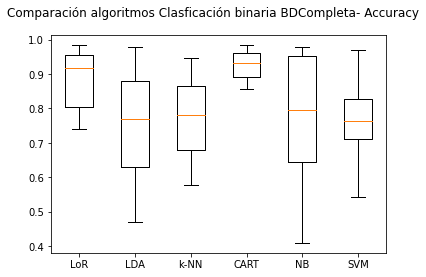

<Figure size 432x288 with 0 Axes>

In [21]:
#Comparación gráfica

#plt.figure(figsize=(20,20))
fig=plt.figure()
fig.suptitle("Comparación algoritmos Clasficación binaria BDCompleta- Accuracy")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos Clasficación binaria BDCompleta- Accuracy.jpg")

###ROC AUC

In [ ]:
# Comparación de modelos
#métrica roc auc

models=[]
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('k-NN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

results=[]
names=[]
scoring='accuracy'
for name,model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDCBX,BDCBY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LoR:93.63%(5.13


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA:89.66%(7.59


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

k-NN:80.38%(14.13
CART:89.25%(7.26
NB:85.60%(9.73


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM:82.75%(10.52


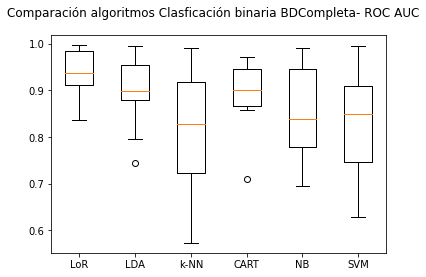

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica

#plt.figure(figsize=(20,20))
fig=plt.figure()
fig.suptitle("Comparación algoritmos Clasficación binaria BDCompleta- ROC AUC")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos Clasficación binaria BDCompleta- ROC AUC.jpg")

#3.DETALLE DE MÉTODOS DE CLASIFICACIÓN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
BDCBY

##3.1 Regresión Logística

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1033
           1       0.93      0.81      0.86       960

    accuracy                           0.88      1993
   macro avg       0.89      0.88      0.88      1993
weighted avg       0.88      0.88      0.88      1993



##3.2 Análisis discriminante Lineal

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=LinearDiscriminantAnalysis()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      1033
           1       0.96      0.50      0.66       960

    accuracy                           0.75      1993
   macro avg       0.82      0.74      0.73      1993
weighted avg       0.81      0.75      0.73      1993



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##3.3KNN

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=KNeighborsClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1033
           1       0.82      0.74      0.78       960

    accuracy                           0.80      1993
   macro avg       0.80      0.79      0.79      1993
weighted avg       0.80      0.80      0.79      1993



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##3.4 Decision Tree Classifier (CART)

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1033
           1       0.97      0.98      0.98       960

    accuracy                           0.98      1993
   macro avg       0.98      0.98      0.98      1993
weighted avg       0.98      0.98      0.98      1993



##3.5 Naive Bayes

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=GaussianNB()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1033
           1       0.98      0.48      0.64       960

    accuracy                           0.74      1993
   macro avg       0.82      0.73      0.72      1993
weighted avg       0.82      0.74      0.72      1993



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##3.6 SupportVectorClassifier (SVC)

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=SVC(gamma='auto')
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1033
           1       0.78      0.85      0.81       960

    accuracy                           0.81      1993
   macro avg       0.81      0.81      0.81      1993
weighted avg       0.81      0.81      0.81      1993



# 4.OPTIMIZACIÓN DE HIPERPARÁMETROS

In [ ]:
#Búsqueda del algoritmo de mejor desmpeño de otra forma mediante el accuraccy

resultados={}
from sklearn.model_selection import cross_validate

def evaluar_modelo(estimador,X,Y):
  resultados_estimador=cross_validate(estimador,X,Y,scoring="accuracy",n_jobs=-1,cv=5,return_train_score=True)
  return resultados_estimador

def ver_resultados():
  resultados_df=pd.DataFrame(resultados).T
  resultados_cols=resultados_df.columns
  for col in resultados_df:
    resultados_df[col]=resultados_df[col].apply(np.mean)
    resultados_df[col+"_idx"]=resultados_df[col]/resultados_df[col].max()
  return resultados_df

In [ ]:
resultados["Reg_Logistica"]=evaluar_modelo(LogisticRegression(),BDCBX,BDCBY)
resultados["Disc_Lineal"]=evaluar_modelo(LinearDiscriminantAnalysis(),BDCBX,BDCBY)
resultados["KNeighbors"]=evaluar_modelo(KNeighborsClassifier(),BDCBX,BDCBY)
resultados["Dec_Tree"]=evaluar_modelo(DecisionTreeClassifier(),BDCBX,BDCBY)
resultados["Naive Bayes"]=evaluar_modelo(GaussianNB(),BDCBX,BDCBY)
resultados["Random Forest"]=evaluar_modelo(RandomForestClassifier(),BDCBX,BDCBY)
resultados["SVC"]=evaluar_modelo(SVC(),BDCBX,BDCBY)
ver_resultados()

,fit_time,score_time,test_score,train_score,fit_time_idx,score_time_idx,test_score_idx,train_score_idx
Reg_Logistica,0.243,0.010,0.860,0.896,0.119,0.021,1.000,0.896
Disc_Lineal,0.033,0.005,0.724,0.778,0.016,0.011,0.842,0.778
KNeighbors,0.020,0.071,0.748,0.883,0.010,0.149,0.870,0.883
Dec_Tree,0.039,0.006,0.800,1.000,0.019,0.012,0.931,1.000
Naive Bayes,0.014,0.005,0.745,0.756,0.007,0.011,0.867,0.756
Random Forest,0.721,0.033,0.797,1.000,0.354,0.070,0.928,1.000
SVC,2.040,0.474,0.648,0.720,1.000,1.000,0.754,0.720


In [ ]:
#Búsqueda del algoritmo de mejor desmpeño de otra forma mediante el área bajo la curva (roc_auc)
resultados={}
from sklearn.model_selection import cross_validate

def evaluar_modelo(estimador,X,Y):
  resultados_estimador=cross_validate(estimador,X,Y,scoring="accuracy",n_jobs=-1,cv=5,return_train_score=True)
  return resultados_estimador

def ver_resultados():
  resultados_df=pd.DataFrame(resultados).T
  resultados_cols=resultados_df.columns
  for col in resultados_df:
    resultados_df[col]=resultados_df[col].apply(np.mean)
    resultados_df[col+"_idx"]=resultados_df[col]/resultados_df[col].max()
  return resultados_df

In [ ]:
resultados["Reg_Logistica"]=evaluar_modelo(LogisticRegression(),BDCBX,BDCBY)
resultados["Disc_Lineal"]=evaluar_modelo(LinearDiscriminantAnalysis(),BDCBX,BDCBY)
resultados["KNeighbors"]=evaluar_modelo(KNeighborsClassifier(),BDCBX,BDCBY)
resultados["Dec_Tree"]=evaluar_modelo(DecisionTreeClassifier(),BDCBX,BDCBY)
resultados["Naive Bayes"]=evaluar_modelo(GaussianNB(),BDCBX,BDCBY)
resultados["Random Forest"]=evaluar_modelo(RandomForestClassifier(),BDCBX,BDCBY)
resultados["SVC"]=evaluar_modelo(SVC(),BDCBX,BDCBY)

ver_resultados()

,fit_time,score_time,test_score,train_score,fit_time_idx,score_time_idx,test_score_idx,train_score_idx
Reg_Logistica,0.127,0.005,0.860,0.896,0.063,0.012,1.000,0.896
Disc_Lineal,0.038,0.005,0.724,0.778,0.019,0.011,0.842,0.778
KNeighbors,0.023,0.069,0.748,0.883,0.012,0.146,0.870,0.883
Dec_Tree,0.040,0.006,0.805,1.000,0.020,0.013,0.937,1.000
Naive Bayes,0.015,0.005,0.745,0.756,0.008,0.011,0.867,0.756
Random Forest,0.752,0.033,0.796,1.000,0.374,0.069,0.926,1.000
SVC,2.010,0.476,0.648,0.720,1.000,1.000,0.754,0.720


Se observa que el mètodo de **Regresión Logística** tiene el mejor desempeño con valores de 1 en ambas métricas. Posteriormente el mètodo de **Random Forest** es el método con mejor desempeño y será el que se evalúe en la optimización de parámetros

##4.1Random Forest

###GridSearchCV

In [ ]:
# Cargue de bibliotecas para la bùsqueda de hiperparámetros óptimos
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Selección del estimador 
estimador_RF=RandomForestClassifier()

In [ ]:
#Visualización de parámetros del modelo Random Forest
estimador_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parametros_busqueda_RF={"criterion":["gini","entropy"],"n_estimators":np.linspace(10,1000,10).astype(int),"class_weight":[None,"balanced"]}

In [ ]:
grid=GridSearchCV(estimator=estimador_RF,param_grid=parametros_busqueda_RF,scoring="roc_auc",n_jobs=-1)

In [ ]:
grid.fit(BDCBX,BDCBY)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='roc_auc')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

Los mejores hiperparámetros obtenidos corresponden a un roc_auc=0.904(0,071), class_weight='balanced', criterion='entropy' y n_estimators=670

In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,6.899,0.083,0.198,5.939e-03,balanced,entropy,670,"{'class_weight': 'balanced', 'criterion': 'ent...",0.970,0.789,0.890,0.890,0.987,0.905,0.071,1
31,1.242,0.020,0.045,6.129e-03,balanced,entropy,120,"{'class_weight': 'balanced', 'criterion': 'ent...",0.970,0.774,0.900,0.894,0.987,0.905,0.075,2
13,3.136,0.048,0.105,3.735e-03,None,entropy,340,"{'class_weight': None, 'criterion': 'entropy',...",0.970,0.777,0.892,0.885,0.988,0.903,0.075,3
34,4.635,0.064,0.134,4.187e-03,balanced,entropy,450,"{'class_weight': 'balanced', 'criterion': 'ent...",0.971,0.776,0.890,0.887,0.989,0.902,0.075,4
32,2.387,0.022,0.075,3.622e-03,balanced,entropy,230,"{'class_weight': 'balanced', 'criterion': 'ent...",0.968,0.771,0.893,0.885,0.988,0.901,0.076,5
35,5.808,0.098,0.166,3.664e-03,balanced,entropy,560,"{'class_weight': 'balanced', 'criterion': 'ent...",0.970,0.764,0.890,0.891,0.989,0.901,0.079,6
19,9.224,0.169,0.295,1.735e-02,None,entropy,1000,"{'class_weight': None, 'criterion': 'entropy',...",0.970,0.765,0.891,0.888,0.989,0.901,0.079,7
33,3.511,0.058,0.104,1.529e-03,balanced,entropy,340,"{'class_weight': 'balanced', 'criterion': 'ent...",0.969,0.774,0.886,0.886,0.987,0.900,0.076,8
39,10.056,0.661,0.272,4.105e-02,balanced,entropy,1000,"{'class_weight': 'balanced', 'criterion': 'ent...",0.969,0.763,0.889,0.890,0.988,0.900,0.079,9
16,6.157,0.073,0.195,3.798e-03,None,entropy,670,"{'class_weight': None, 'criterion': 'entropy',...",0.970,0.772,0.885,0.883,0.988,0.900,0.077,10


In [ ]:
resultados["RF_gridsearch"]=evaluar_modelo(grid.best_estimator_,BDCBX,BDCBY)

In [ ]:
resultados["RF_gridsearch"]=evaluar_modelo(grid.best_estimator_,BDCBX,BDCBY)

Se concluye que

###RandomizedSearch

In [ ]:
busqueda_random=RandomizedSearchCV(estimator=estimador_RF,
                                   param_distributions=parametros_busqueda_RF,
                                   scoring="roc_auc",n_jobs=-1,n_iter=15)

In [ ]:
resultados["RF_gridsearch"]=evaluar_modelo(grid.best_estimator_,BDCBX,BDCBY)

In [ ]:
busqueda_random.fit(BDCBX,BDCBY)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

##4.2 Decision Tree Classifier

###GridSearchCV

In [ ]:
#Selección del estimador 
estimador_DT=DecisionTreeClassifier()

In [ ]:
#Visualización de parámetros del modelo Random Forest
estimador_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
parametros_busqueda_DT={"criterion":['gini', 'entropy'],"max_depth":[2,4,6,8,10,12],'min_samples_leaf': [5, 10, 20, 50, 100]}

In [ ]:
grid=GridSearchCV(estimator=estimador_DT,param_grid=parametros_busqueda_DT,scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(BDCBX,BDCBY)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8420423227900315
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=100)
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 100}


In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
59,0.032,4.101e-03,0.006,1.667e-03,entropy,12,100,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.839,0.669,0.865,0.889,0.947,0.842,0.093,1
54,0.035,2.469e-03,0.006,1.897e-04,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.839,0.669,0.865,0.889,0.947,0.842,0.093,1
49,0.033,9.077e-04,0.007,2.313e-03,entropy,8,100,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.839,0.669,0.865,0.889,0.947,0.842,0.093,1
44,0.034,1.992e-03,0.006,9.549e-05,entropy,6,100,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.839,0.669,0.865,0.889,0.947,0.842,0.093,1
56,0.042,2.504e-03,0.006,1.480e-04,entropy,12,10,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.843,0.644,0.852,0.888,0.952,0.836,0.103,5
52,0.039,2.830e-03,0.007,1.332e-03,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.847,0.605,0.860,0.907,0.950,0.834,0.120,6
51,0.041,3.999e-03,0.006,3.253e-04,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.843,0.644,0.852,0.877,0.952,0.834,0.102,7
43,0.036,1.420e-03,0.007,1.592e-03,entropy,6,50,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.861,0.599,0.857,0.900,0.952,0.834,0.122,8
53,0.036,1.673e-03,0.006,2.367e-04,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.860,0.599,0.857,0.900,0.952,0.833,0.122,9
58,0.038,3.112e-03,0.006,1.117e-04,entropy,12,50,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.860,0.599,0.857,0.900,0.952,0.833,0.122,9


##4.3 KNN

###GridSearchCV

In [ ]:
#Selección del estimador 
estimador_KNN=KNeighborsClassifier()

In [ ]:
#Visualización de parámetros del modelo KNN
estimador_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
parametros_busqueda_KNN={"n_neighbors":list(range(1,20)),"p":[1,2,3],"leaf_size":list(range(1,25)),'weights':['uniform','distance'],
               'metric':['minkowski','euclidean','manhattan']}

In [ ]:
grid=GridSearchCV(estimator=estimador_KNN,param_grid=parametros_busqueda_KNN,scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(BDCBX,BDCBY)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.764955759833918
KNeighborsClassifier(leaf_size=1, p=1, weights='distance')
{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6751,0.021,1.683e-03,0.021,2.159e-03,20,manhattan,5,1,distance,"{'leaf_size': 20, 'metric': 'manhattan', 'n_ne...",0.694,0.736,0.781,0.791,0.823,0.765,0.045,1
7781,0.019,4.275e-04,0.021,1.923e-03,23,manhattan,5,3,distance,"{'leaf_size': 23, 'metric': 'manhattan', 'n_ne...",0.694,0.736,0.781,0.791,0.823,0.765,0.045,1
6865,0.020,1.525e-03,0.021,1.174e-03,21,minkowski,5,1,distance,"{'leaf_size': 21, 'metric': 'minkowski', 'n_ne...",0.694,0.736,0.781,0.791,0.823,0.765,0.045,1
5725,0.021,9.121e-04,0.021,1.460e-03,17,manhattan,5,1,distance,"{'leaf_size': 17, 'metric': 'manhattan', 'n_ne...",0.694,0.736,0.781,0.791,0.823,0.765,0.045,1
5727,0.020,7.262e-04,0.021,8.236e-04,17,manhattan,5,2,distance,"{'leaf_size': 17, 'metric': 'manhattan', 'n_ne...",0.694,0.736,0.781,0.791,0.823,0.765,0.045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,0.021,1.158e-03,0.082,5.845e-03,14,minkowski,14,2,uniform,"{'leaf_size': 14, 'metric': 'minkowski', 'n_ne...",0.615,0.667,0.763,0.781,0.783,0.722,0.068,8113
7720,0.022,3.038e-03,0.080,4.757e-03,23,euclidean,14,3,uniform,"{'leaf_size': 23, 'metric': 'euclidean', 'n_ne...",0.615,0.667,0.763,0.781,0.783,0.722,0.068,8113
6578,0.023,5.514e-03,0.073,2.126e-03,20,minkowski,14,2,uniform,"{'leaf_size': 20, 'metric': 'minkowski', 'n_ne...",0.615,0.667,0.763,0.781,0.783,0.722,0.068,8113
6920,0.019,4.408e-04,0.082,5.050e-03,21,minkowski,14,2,uniform,"{'leaf_size': 21, 'metric': 'minkowski', 'n_ne...",0.615,0.667,0.763,0.781,0.783,0.722,0.068,8113
